In [1]:
%load_ext tensorboard

In [2]:
import tensorflow as tf 
import numpy as np
from tensorflow import keras 
import datetime
import matplotlib.pyplot as plt

In [3]:
# check the version of tensorflow 
print(tf.__version__)

2.3.0


In [4]:
#network parameters
EPOCHS = 200 
BATCH_SIZE = 128 
VERBOSE = 1
NB_CLASSES = 10 
N_HIDDEN = 128 
VALIDATION_SPLIT = 0.2 

In [5]:
# loading MNIST dataset 
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# shape of original data  

#X_train
X_train.shape

(60000, 28, 28)

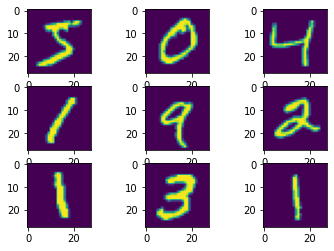

In [7]:
 # plotting the first 9 images in the train set of MNIST
 fig , axs = plt.subplots(3, 3)
 cnt = 0
 for i in range(3):
     for j in range(3):
         axs[i, j].imshow(X_train[cnt])
         cnt += 1

In [8]:
# X_Train is a 60000 rows of 28x28 values,  we reshape it to 60000 x 784 
RESHAPED = 784 

X_train = X_train.reshape(60000,RESHAPED)
X_test = X_test.reshape(10000,RESHAPED) 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


# Normalize inputs to be within in [0,1]
X_train /= 255
X_test /= 255 
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# One-hot representation of the labels 
Y_train = tf.keras.utils.to_categorical(Y_train, NB_CLASSES)
Y_test = tf.keras.utils.to_categorical(Y_test, NB_CLASSES)

60000 train samples
10000 test samples


In [9]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [10]:
#Build the model 
model = tf.keras.models.Sequential() 
model.add(keras.layers.Dense(NB_CLASSES,
          input_shape=(RESHAPED,),
          name='dense_layer',
          activation='softmax'))

In [11]:
#Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [12]:
#compiling the model 
model.compile(optimizer='SGD',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [13]:
# call for tensorboard 
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [14]:
# Training the model 
model.fit(X_train, Y_train, 
             batch_size=BATCH_SIZE, epochs=EPOCHS,
             verbose=VERBOSE, validation_split=VALIDATION_SPLIT,
              callbacks=[tensorboard_callback])

Epoch 1/200
  1/375 [..............................] - ETA: 0s - loss: 2.3732 - accuracy: 0.1328WARNING:tensorflow:From C:\Users\Alfredo\anaconda3\envs\RNP\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
375/375 [==============================] - 2s 5ms/step - loss: 1.3626 - accuracy: 0.6768 - val_loss: 0.8894 - val_accuracy: 0.8193
Epoch 2/200
375/375 [==============================] - 1s 2ms/step - loss: 0.7912 - accuracy: 0.8275 - val_loss: 0.6556 - val_accuracy: 0.8547
Epoch 3/200
375/375 [==============================] - 1s 1ms/step - loss: 0.6431 - accuracy: 0.8505 - val_loss: 0.5612 - val_accuracy: 0.8688
Epoch 4/200
375/375 [==============================] - 1s 2ms/step - loss: 0.5711 - accuracy: 0.8616 - val_loss: 0.5082 - val_accuracy: 0.8780
Epoch 5/200
375/375 [==============================

375/375 [==============================] - 0s 1ms/step - loss: 0.3189 - accuracy: 0.9110 - val_loss: 0.3051 - val_accuracy: 0.9159
Epoch 54/200
375/375 [==============================] - 0s 1ms/step - loss: 0.3181 - accuracy: 0.9113 - val_loss: 0.3045 - val_accuracy: 0.9162
Epoch 55/200
375/375 [==============================] - 0s 1ms/step - loss: 0.3173 - accuracy: 0.9115 - val_loss: 0.3039 - val_accuracy: 0.9162
Epoch 56/200
375/375 [==============================] - 0s 1ms/step - loss: 0.3166 - accuracy: 0.9119 - val_loss: 0.3034 - val_accuracy: 0.9163
Epoch 57/200
375/375 [==============================] - 0s 1ms/step - loss: 0.3158 - accuracy: 0.9122 - val_loss: 0.3028 - val_accuracy: 0.9162
Epoch 58/200
375/375 [==============================] - 0s 1ms/step - loss: 0.3151 - accuracy: 0.9126 - val_loss: 0.3023 - val_accuracy: 0.9165
Epoch 59/200
375/375 [==============================] - 0s 1ms/step - loss: 0.3145 - accuracy: 0.9126 - val_loss: 0.3018 - val_accuracy: 0.9164
Epoch

375/375 [==============================] - 0s 1ms/step - loss: 0.2928 - accuracy: 0.9184 - val_loss: 0.2858 - val_accuracy: 0.9209
Epoch 110/200
375/375 [==============================] - 0s 1ms/step - loss: 0.2925 - accuracy: 0.9183 - val_loss: 0.2856 - val_accuracy: 0.9211
Epoch 111/200
375/375 [==============================] - 0s 1ms/step - loss: 0.2922 - accuracy: 0.9184 - val_loss: 0.2854 - val_accuracy: 0.9213
Epoch 112/200
375/375 [==============================] - 0s 1ms/step - loss: 0.2920 - accuracy: 0.9184 - val_loss: 0.2852 - val_accuracy: 0.9210
Epoch 113/200
375/375 [==============================] - 0s 1ms/step - loss: 0.2917 - accuracy: 0.9189 - val_loss: 0.2851 - val_accuracy: 0.9209
Epoch 114/200
375/375 [==============================] - 0s 1ms/step - loss: 0.2914 - accuracy: 0.9187 - val_loss: 0.2849 - val_accuracy: 0.9215
Epoch 115/200
375/375 [==============================] - 0s 1ms/step - loss: 0.2911 - accuracy: 0.9190 - val_loss: 0.2847 - val_accuracy: 0.9215

375/375 [==============================] - 0s 1ms/step - loss: 0.2811 - accuracy: 0.9217 - val_loss: 0.2781 - val_accuracy: 0.9222
Epoch 166/200
375/375 [==============================] - 0s 1ms/step - loss: 0.2809 - accuracy: 0.9217 - val_loss: 0.2780 - val_accuracy: 0.9223
Epoch 167/200
375/375 [==============================] - 1s 2ms/step - loss: 0.2807 - accuracy: 0.9219 - val_loss: 0.2779 - val_accuracy: 0.9222
Epoch 168/200
375/375 [==============================] - 0s 1ms/step - loss: 0.2806 - accuracy: 0.9221 - val_loss: 0.2778 - val_accuracy: 0.9225
Epoch 169/200
375/375 [==============================] - 0s 1ms/step - loss: 0.2804 - accuracy: 0.9221 - val_loss: 0.2778 - val_accuracy: 0.9222
Epoch 170/200
375/375 [==============================] - 0s 1ms/step - loss: 0.2803 - accuracy: 0.9220 - val_loss: 0.2776 - val_accuracy: 0.9225
Epoch 171/200
375/375 [==============================] - 0s 1ms/step - loss: 0.2801 - accuracy: 0.9221 - val_loss: 0.2775 - val_accuracy: 0.9230

In [15]:
#evaluate the model 
test_loss, test_acc = model.evaluate(X_test,Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 567us/step - loss: 0.2777 - accuracy: 0.9218
Test accuracy: 0.9218000173568726


In [16]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 16216), started 0:18:57 ago. (Use '!kill 16216' to kill it.)